In [2]:
import numpy as np
import os
from dopamine.colab import utils as colab_utils
from absl import flags

ALL_GAMES = [
    'AirRaid',
    'Alien',
    'Amidar',
    'Assault',
    'Asterix',
    'Asteroids',
    'Atlantis',
    'BankHeist',
    'BattleZone',
    'BeamRider',
    'Berzerk',
    'Bowling',
    'Boxing',
    'Breakout',
    'Carnival',
    'Centipede',
    'ChopperCommand',
    'CrazyClimber',
    'DemonAttack',
    'DoubleDunk',
    'ElevatorAction',
    'Enduro',
    'FishingDerby',
    'Freeway',
    'Frostbite',
    'Gopher',
    'Gravitar',
    'Hero',
    'IceHockey',
    'Jamesbond',
    'JourneyEscape',
    'Kangaroo',
    'Krull',
    'KungFuMaster',
    'MontezumaRevenge',
    'MsPacman',
    'NameThisGame',
    'Phoenix',
    'Pitfall',
    'Pong',
    'Pooyan',
    'PrivateEye',
    'Qbert',
    'Riverraid',
    'RoadRunner',
    'Robotank',
    'Seaquest',
    'Skiing',
    'Solaris',
    'SpaceInvaders',
    'StarGunner',
    'Tennis',
    'TimePilot',
    'Tutankham',
    'UpNDown',
    'Venture',
    'VideoPinball',
    'WizardOfWor',
    'YarsRevenge',
    'Zaxxon',
]

In [3]:
# move the desired folder
%cd ..

/home/zosov/workspace/bisimulation-PER


## Example 1: Plot against Dopamine baselines

In [4]:
# NOTE: it requires and older version of pandas
# Execute with the environment and save the results as a CSV
# experimental_data = colab_utils.load_baselines('./dopamine_logs')

In [5]:
# experimental_data

In [6]:
# algorithms = ['dqn', 'c51', 'rainbow', 'iqn']

# # Filter the DQN results
# def filter_data(experimental_data, algorithm='dqn'):
#     """Filter the experimental data to only include DQN results."""
#     filtered_data = {}
#     for game, data in experimental_data.items():
#         filtered_data[game] = data[data['agent'] == algorithm]
#     return filtered_data

In [7]:

# for algorithm  in algorithms:
#     # Filter the data for the current algorithm
#     filtered_data = filter_data(experimental_data, algorithm)
    
#     # Save the filtered data to a CSV file
#     for game_name in ALL_GAMES:
#         game_data = filtered_data[game_name]
        
#         # Create the output directory if it doesn't exist
#         output_dir = f'outputs/baselines/{algorithm}'
#         os.makedirs(output_dir, exist_ok=True)

#         # Save each game's data to a separate CSV file
#         game_data.to_csv(f'outputs/baselines/{algorithm}/{game_name}_data.csv', index=False)
#         print(f"Saved {algorithm} data for {game_name} to {output_dir}/{game_name}_data.csv")


In [8]:
# Load the data from the CSV files into a dictionary of dataframes
import pandas as pd

def load_baselines(load_path = 'outputs/baselines/dqn'):
    dataframes = {}
    for game_name in ALL_GAMES:
        # Load each game's data from the CSV file
        df = pd.read_csv(f'{load_path}/{game_name}_data.csv')
        
        # Store the dataframe in the dictionary
        dataframes[game_name] = df

    return dataframes

dataframes = load_baselines(load_path = 'outputs/baselines/dqn')
dataframes

{'AirRaid':      run_number  iteration  train_episode_returns agent
 0           1.0        0.0             514.980545   dqn
 1           1.0        1.0             367.689295   dqn
 2           1.0        2.0             553.518124   dqn
 3           1.0        3.0            1090.991903   dqn
 4           1.0        4.0            1484.080189   dqn
 ..          ...        ...                    ...   ...
 990         5.0      194.0            6738.218391   dqn
 991         5.0      195.0            7486.250000   dqn
 992         5.0      196.0            7756.493506   dqn
 993         5.0      197.0            7641.346154   dqn
 994         5.0      198.0            7653.481013   dqn
 
 [995 rows x 4 columns],
 'Alien':      run_number  iteration  train_episode_returns agent
 0           1.0        0.0             297.572559   dqn
 1           1.0        1.0             461.618357   dqn
 2           1.0        2.0             536.330049   dqn
 3           1.0        3.0             5

# Mergin New Results

In [9]:
import itertools
import pandas as pd
from dopamine.colab.utils import load_statistics, summarize_data, read_experiment
import numpy as np

In [10]:
dataframes

{'AirRaid':      run_number  iteration  train_episode_returns agent
 0           1.0        0.0             514.980545   dqn
 1           1.0        1.0             367.689295   dqn
 2           1.0        2.0             553.518124   dqn
 3           1.0        3.0            1090.991903   dqn
 4           1.0        4.0            1484.080189   dqn
 ..          ...        ...                    ...   ...
 990         5.0      194.0            6738.218391   dqn
 991         5.0      195.0            7486.250000   dqn
 992         5.0      196.0            7756.493506   dqn
 993         5.0      197.0            7641.346154   dqn
 994         5.0      198.0            7653.481013   dqn
 
 [995 rows x 4 columns],
 'Alien':      run_number  iteration  train_episode_returns agent
 0           1.0        0.0             297.572559   dqn
 1           1.0        1.0             461.618357   dqn
 2           1.0        2.0             536.330049   dqn
 3           1.0        3.0             5

In [11]:
!ls

Dockerfile		       job_metric_dqn_bper_cpu.sh
LICENSE			       job_metric_dqn_bper_gpu.sh
README.md		       job_one_per_game_gpu.sh
__pycache__		       job_only_one_game.sh
atari_100k		       jobs_multiple_gpu.sh
baselines		       jupyter_notebooks
calculate_exploration.py       logs
calculate_grads_norm.py        metric_dqn_agent.py
calculate_post_train_stats.py  metric_dqn_bper_agent.py
checkpoints		       metric_implicit_quantile_agent.py
clean_all_checkpoints_game.sh  metric_quantile_agent.py
clean_checkpoints.sh	       metric_rainbow_agent.py
custom_replay_buffer.py        metric_utils.py
dopamine_logs		       networks.py
dqn.gin			       outputs
dqn_profiling.gin	       pretrained_metric_dqn.py
enough_disk_space.py	       run-eval.sh
enough_resources.py	       run-script.sh
eval_metric_dqn.gin	       synchronize_checkpoints.sh
eval_utils.py		       synchronize_results.sh
job_calculate_post_stats.sh    test.sh
job_cpu_profiling.sh	       train.py


In [12]:
import collections

game = 'Hero'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                         ('agent', ["metric_dqn", 'metric_dqn_per', 'metric_dqn_bper']),
                         ('run_number', ['118398', '711872', '919409']),
                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)
results

,agent,run_number,iteration,train_episode_returns
0,metric_dqn,118398.0,0.0,1031.859606
1,metric_dqn,118398.0,1.0,2213.878049
2,metric_dqn,118398.0,2.0,2609.000000
3,metric_dqn,118398.0,3.0,2884.771242
4,metric_dqn,118398.0,4.0,2974.258065
...,...,...,...,...
895,metric_dqn_bper,919409.0,95.0,15972.341040
896,metric_dqn_bper,919409.0,96.0,17406.792453
897,metric_dqn_bper,919409.0,97.0,17791.346154
898,metric_dqn_bper,919409.0,98.0,17807.327044


In [13]:
# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')

In [263]:
# Plot the baselines and my results
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# GAMES = ['Asteroids']
def plot_game(game, dataframes, x_axis='iteration', y_axis='train_episode_returns',
              x_label='Iteration', y_label='Returns'):
    
    # Define a custom color palette with 4 colors
    custom_palette = {
        "metric_dqn": "#d62728",       # Blue
        "metric_dqn_per": "#ff7f0e",   # Orange
        "metric_dqn_bper": "#2ca02c",  # Green
        "dqn": "#1f77b4",               # Red
        "metric_dqn_bper_norm": "#9467bd", # Purple
        "metric_dqn_bper_no_norm": "#2ca02c",  # Green
        "metric_dqn_bper_scaling": "#029e73ff", # Brown
        "metric_dqn_bper_softmax": "#000000", # Black
        "metric_dqn_bper_softmax_weight": "#8c564b", # Light Pink
        "metric_dqn_bper_exponential_norm": "#e377c2", # Light Purple
        "metric_dqn_bper_td_weights" : "#7f7f7f", # Gray
        "metric_dqn_bper_scaling_512": "#64b5cd", # Light Blue

    }

    # Filter the data to include only the first 100 iterations
    filtered_data = dataframes[game][dataframes[game]['iteration'] <= 100]

    fig, ax = plt.subplots(figsize=(16,8))
    sns.lineplot(x=x_axis, y=y_axis, hue='agent',
                data=filtered_data, ax=ax, palette=custom_palette)

    # Format x-axis ticks to show values in millions
    # def millions(x, pos):
    #     if x == 0:
    #         return '0'
    #     return '{:.0f}M'.format(x)
    
    # formatter = FuncFormatter(millions)
    # ax.xaxis.set_major_formatter(formatter)

    plt.title(game)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

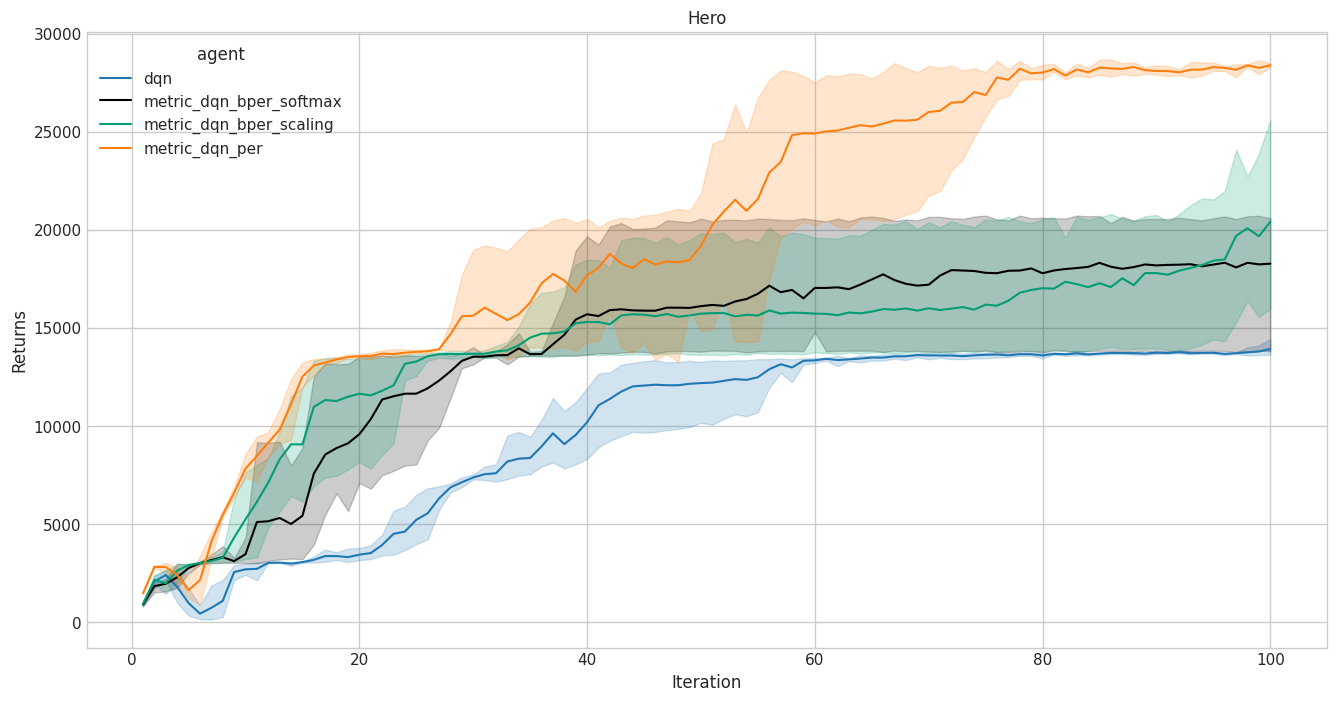

In [264]:
# NOTE: Synchronize the results from the ssh server before runing the next cell

game = 'Hero'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                         ('agent', [
                                    # "metric_dqn", 
                                    'metric_dqn_per', 
                                    "metric_dqn_bper_scaling",
                                    # "metric_dqn_bper_scaling_512", 
                                    'metric_dqn_bper_softmax',
                                    # 'metric_dqn_bper_softmax_weight',
                                    # "metric_dqn_bper_exponential_norm",
                                    # "metric_dqn_bper_td_weights"
                                    ]),
                         ('run_number', ['118398', '711872', '919409']),
                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)

# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')#
dataframes[game]['iteration'] = dataframes[game]['iteration'] + 1

# Plot the baselines and my results
plot_game(game = game, dataframes = dataframes)

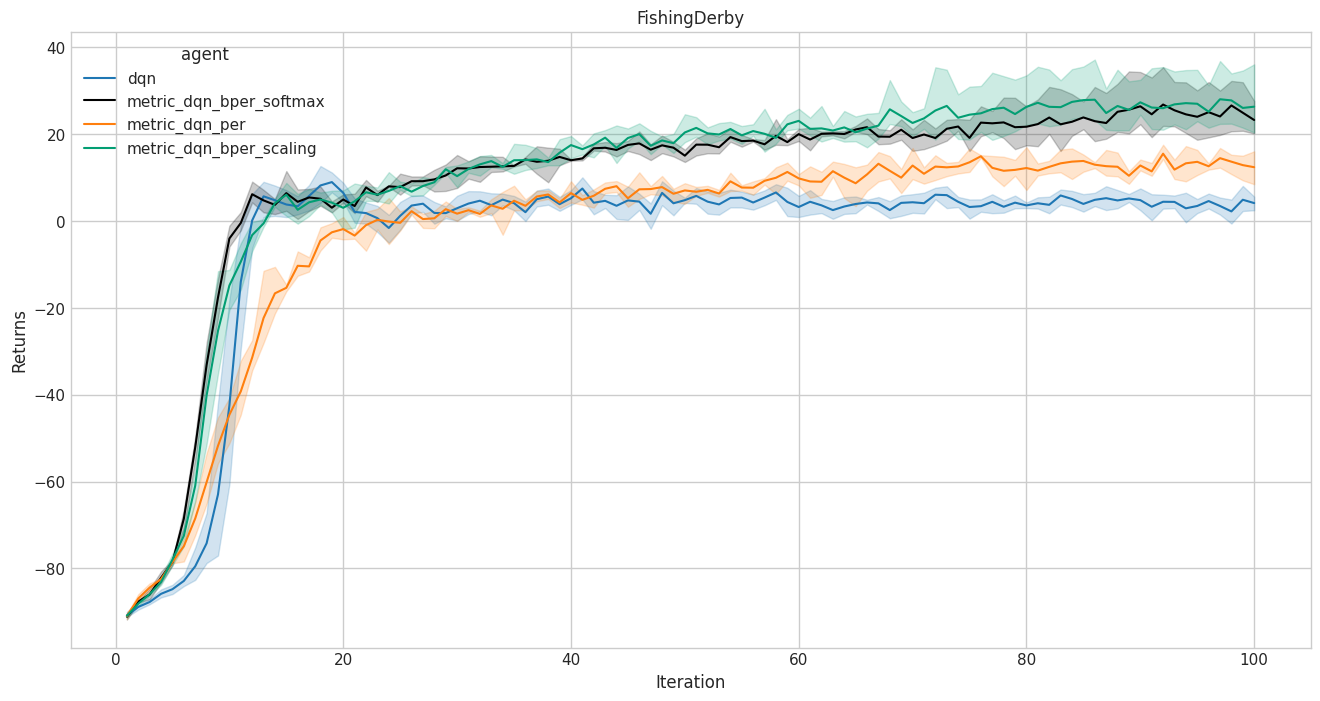

In [265]:
# NOTE: Synchronize the results from the ssh server before runing the next cell

game = 'FishingDerby'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                         ('agent', [
                                    # "metric_dqn", 
                                    'metric_dqn_per',
                                    "metric_dqn_bper_scaling",
                                    # "metric_dqn_bper_scaling_512", 
                                    'metric_dqn_bper_softmax',
                                    # "metric_dqn_bper_exponential_norm",
                                    # "metric_dqn_bper_td_weights"
                                    ]),
                         ('run_number', ['118398', '711872', '919409']),
                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)

# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')
dataframes[game]['iteration'] = dataframes[game]['iteration'] + 1

# Plot the baselines and my results
plot_game(game = game, dataframes = dataframes)

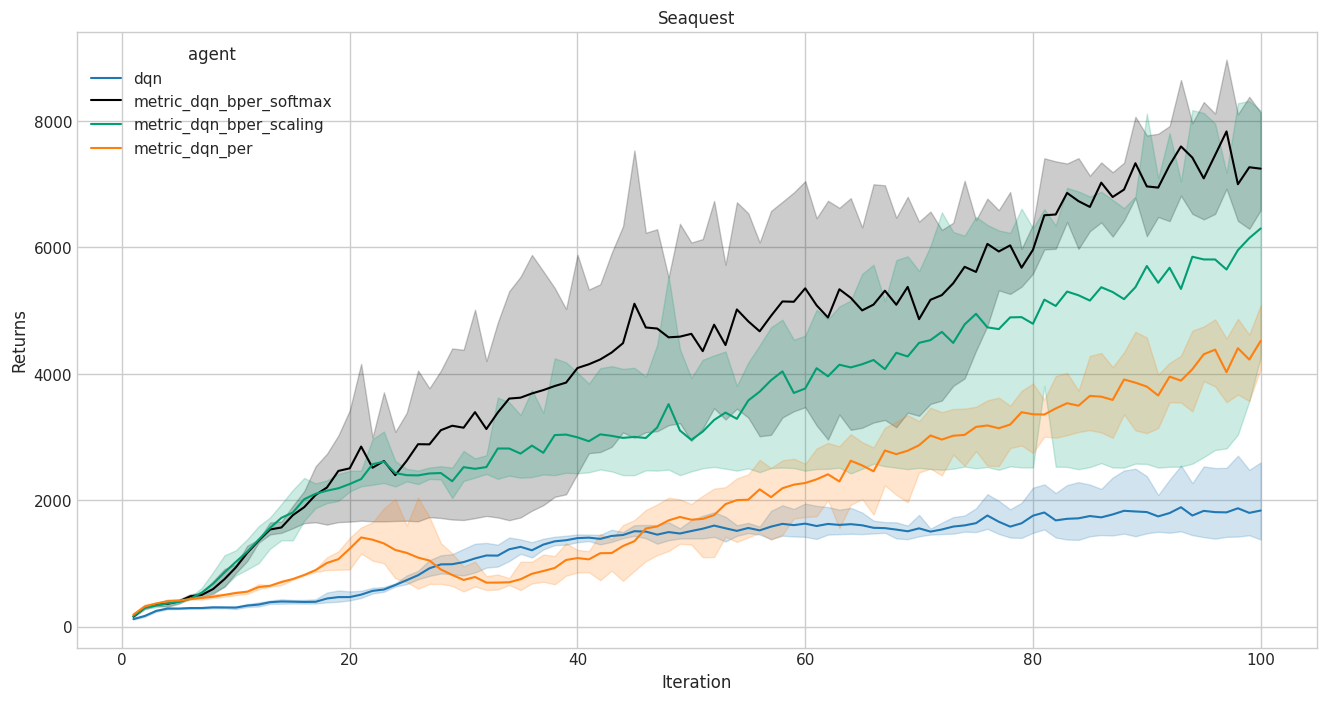

In [266]:
# NOTE: Synchronize the results from the ssh server before runing the next cell

game = 'Seaquest'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                         ('agent', [
                                    # "metric_dqn", 
                                    'metric_dqn_per', 
                                    "metric_dqn_bper_scaling",
                                    # "metric_dqn_bper_scaling_512",
                                    'metric_dqn_bper_softmax',
                                    # 'metric_dqn_bper_softmax_weight',
                                    # "metric_dqn_bper_exponential_norm",
                                    # "metric_dqn_bper_td_weights"
                                    ]),
                         ('run_number', ['118398', '711872', '919409']),
                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)

# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')
dataframes[game]['iteration'] = dataframes[game]['iteration'] + 1

# Plot the baselines and my results
plot_game(game = game, dataframes = dataframes)

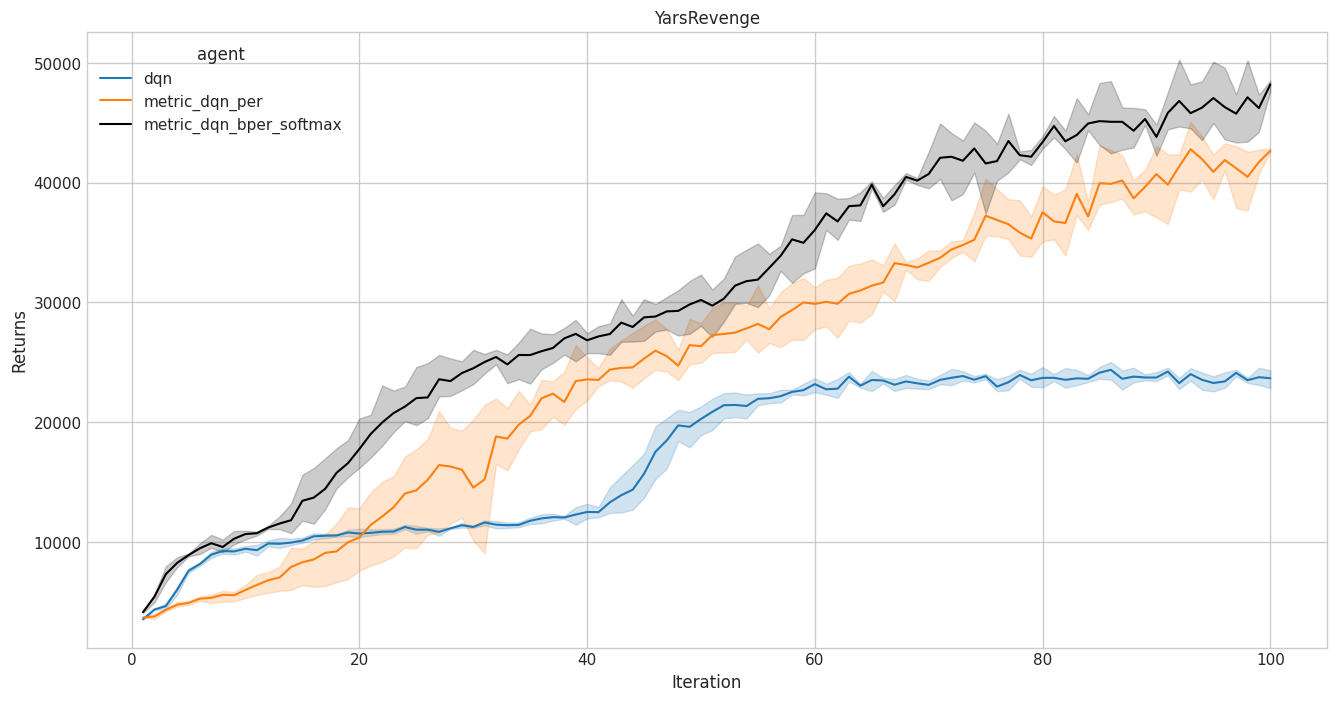

In [267]:
# NOTE: Synchronize the results from the ssh server before runing the next cell

game = 'YarsRevenge'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                         ('agent', [
                                    # "metric_dqn", 
                                    'metric_dqn_per', 
                                    'metric_dqn_bper_softmax',
                                    # "metric_dqn_bper_exponential_norm",
                                    ]),
                         ('run_number', ['118398', '711872', '919409']),
                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)

# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')
dataframes[game]['iteration'] = dataframes[game]['iteration'] + 1

# Plot the baselines and my results
plot_game(game = game, dataframes = dataframes)

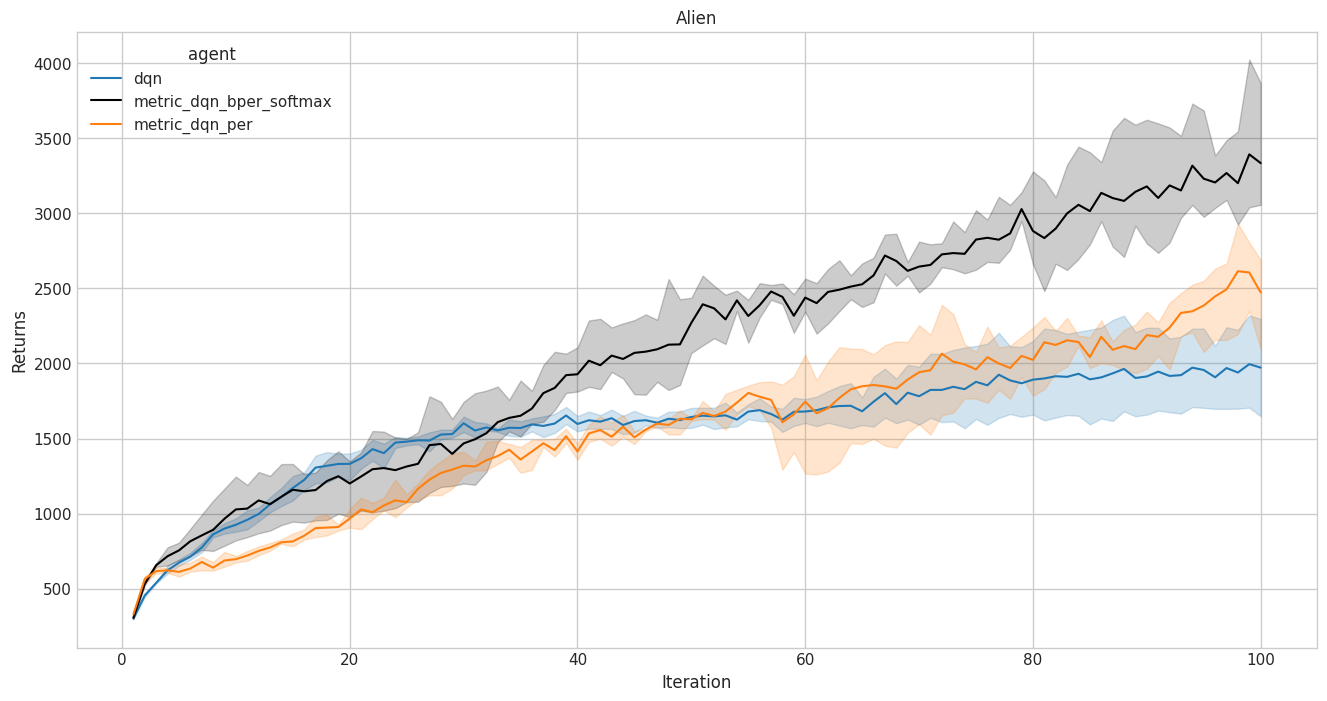

In [268]:
# NOTE: Synchronize the results from the ssh server before runing the next cell

game = 'Alien'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                                    ('agent', [
                                    # "metric_dqn", 
                                    'metric_dqn_per', 
                                    'metric_dqn_bper_softmax',
                                    # "metric_dqn_bper_scaling",
                                    # "metric_dqn_bper_exponential_norm",
                                    # "metric_dqn_bper_td_weights"
                                    ]),
                         ('run_number', ['118398', '711872', '919409']),
                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)

# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')
dataframes[game]['iteration'] = dataframes[game]['iteration'] + 1

# Plot the baselines and my results
plot_game(game = game, dataframes = dataframes)

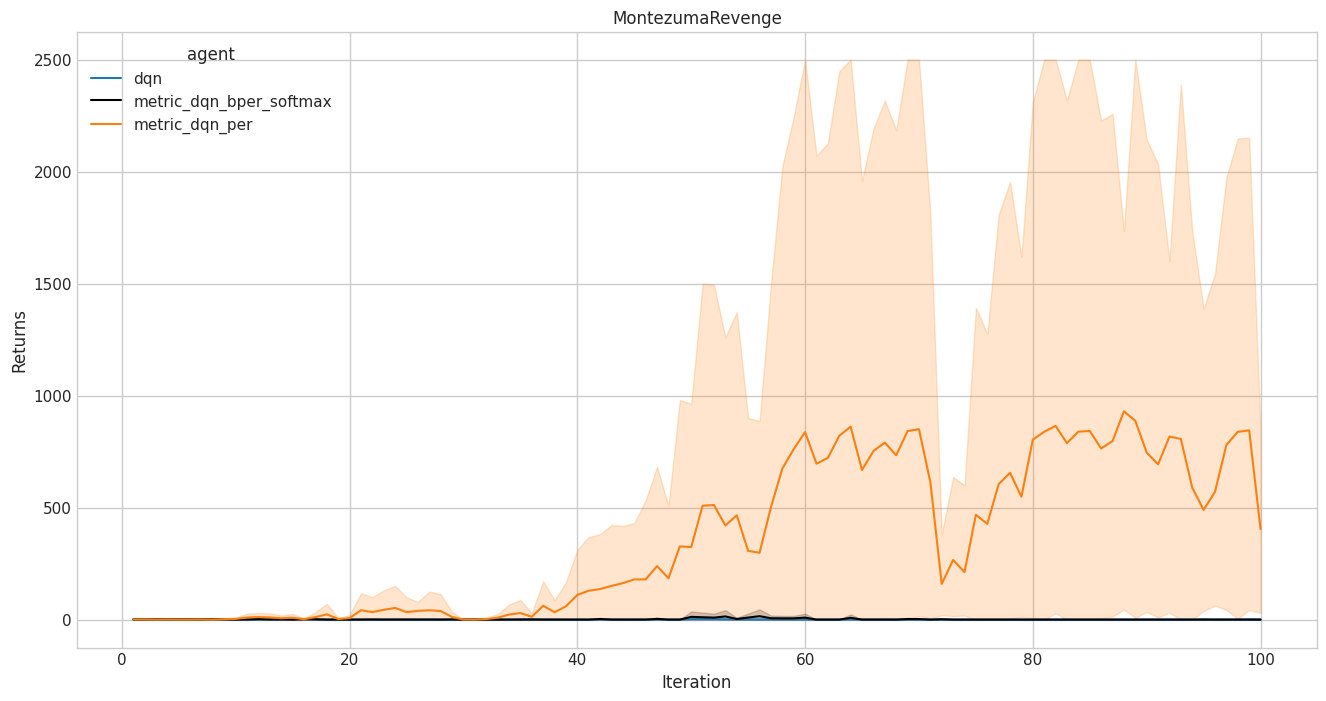

In [269]:
# NOTE: Synchronize the results from the ssh server before runing the next cell

game = 'MontezumaRevenge'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                                    ('agent', [
                                    # "metric_dqn", 
                                    'metric_dqn_per', 
                                    'metric_dqn_bper_softmax',
                                    # "metric_dqn_bper_exponential_norm",
                                    # "metric_dqn_bper_td_weights"
                                    ]),
                         ('run_number', ['118398', '711872', '919409']),
                            # ('run_number', ['118398', '919409']),

                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)

# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')
dataframes[game]['iteration'] = dataframes[game]['iteration'] + 1

# Plot the baselines and my results
plot_game(game = game, dataframes = dataframes)

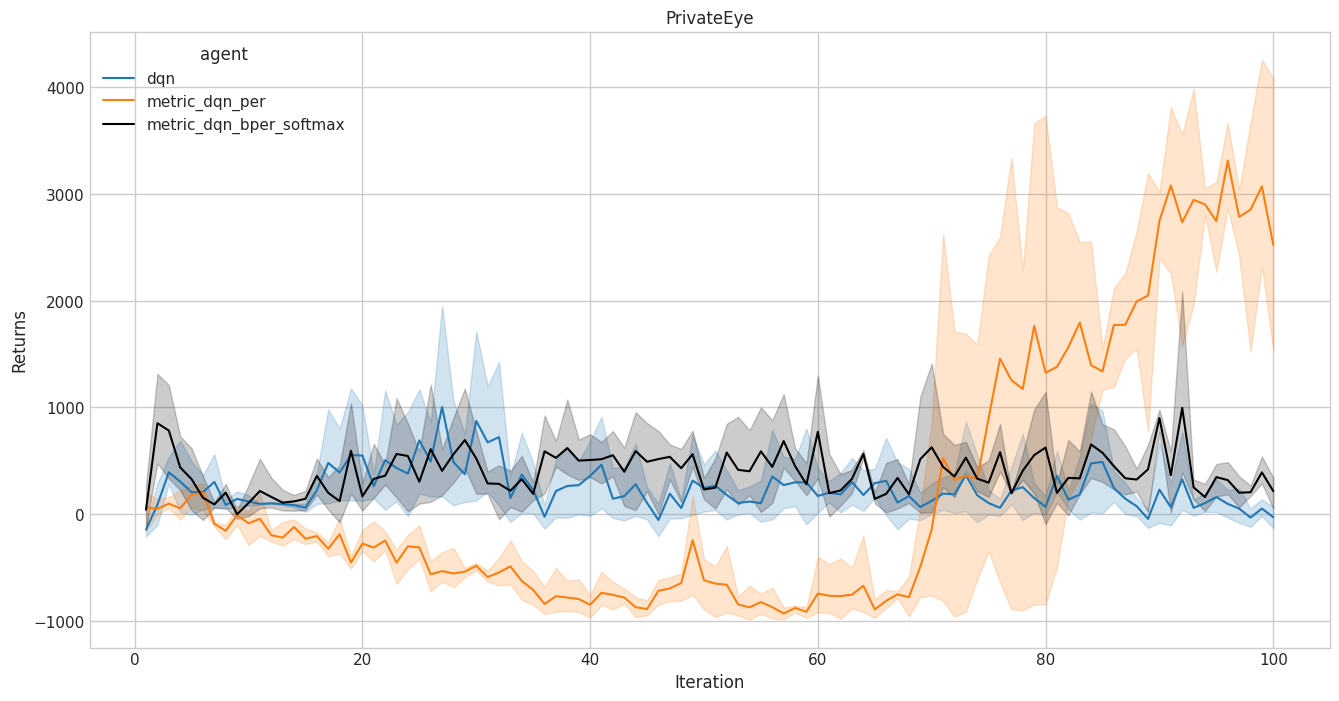

In [270]:
# NOTE: Synchronize the results from the ssh server before runing the next cell

game = 'PrivateEye'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                                    ('agent', [
                                    # "metric_dqn", 
                                    'metric_dqn_per', 
                                    'metric_dqn_bper_softmax',
                                    # "metric_dqn_bper_exponential_norm",
                                    # "metric_dqn_bper_td_weights"
                                    ]),
                         ('run_number', ['118398', '711872', '919409']),
                            # ('run_number', ['118398', '919409']),

                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)

# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')
dataframes[game]['iteration'] = dataframes[game]['iteration'] + 1

# Plot the baselines and my results
plot_game(game = game, dataframes = dataframes)

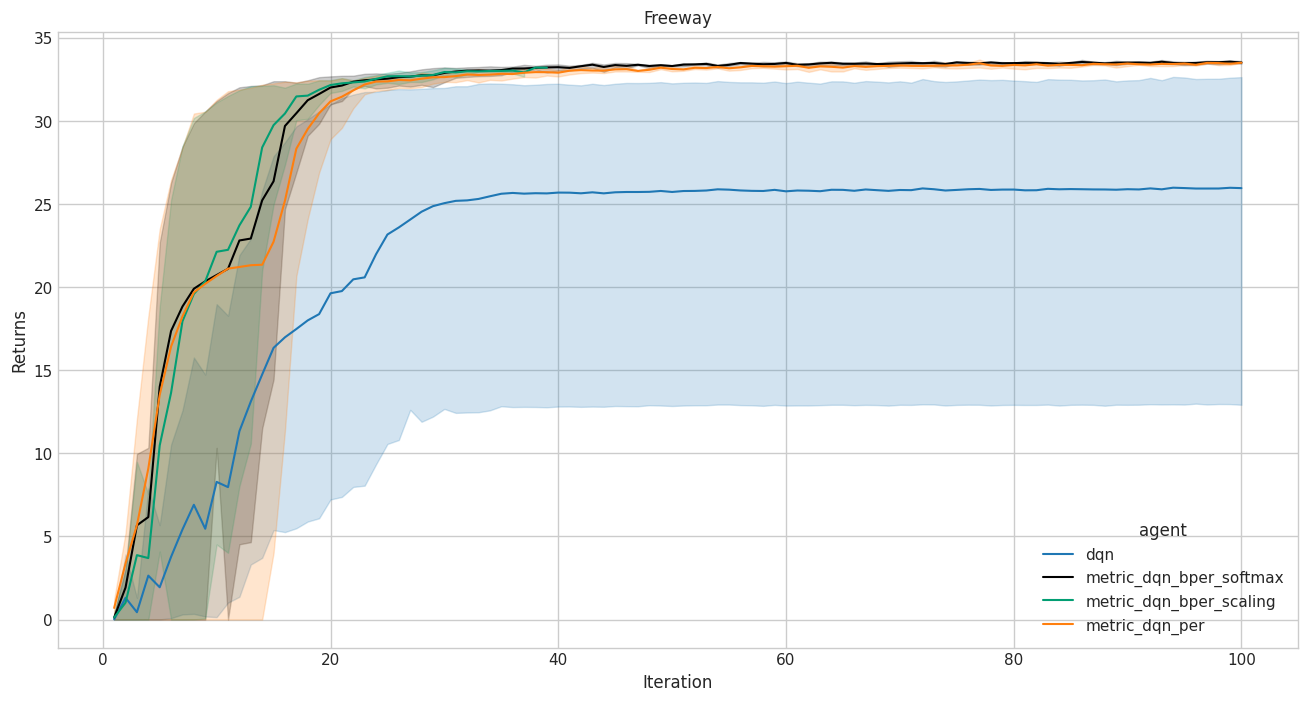

In [271]:
# NOTE: Synchronize the results from the ssh server before runing the next cell

game = 'Freeway'
results = read_experiment( log_path = f"logs/{game}/",
                     parameter_set= collections.OrderedDict([
                                    ('agent', [
                                    # "metric_dqn", 
                                    'metric_dqn_per', 
                                    'metric_dqn_bper_softmax',
                                    'metric_dqn_bper_scaling',
                                    ]),
                         ('run_number', ['118398', '711872', '919409']),
                            # ('run_number', ['118398', '919409']),

                     ]),
                     job_descriptor='{}/{}',
                     summary_keys=['train_episode_returns'],)

# Load dqn baseline data
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

# Merging the new results to the existing data frame
dataframes[game] = dataframes[game].merge(
    results, how='outer')
dataframes[game]['iteration'] = dataframes[game]['iteration'] + 1

# Plot the baselines and my results
plot_game(game = game, dataframes = dataframes)

### Plot gains over the baseline dqn

In [272]:
# Load games data calculated so far
games_so_far = ['Hero', 'FishingDerby', 'Seaquest', 'YarsRevenge', 'Alien', 'MontezumaRevenge', 'PrivateEye', 'Freeway']
dataframes = load_baselines(load_path = 'outputs/baselines/dqn')

for game in games_so_far:
        
    if game in ["Alien", "YarsRevenge" ]:
        results = read_experiment( log_path = f"logs/{game}/",
            parameter_set= collections.OrderedDict([
                ('agent', [
                            "metric_dqn", 
                            'metric_dqn_per', 
                            'metric_dqn_bper_softmax',
                            ]),
                ('run_number', ['118398', '711872', '919409']),
            ]),
            job_descriptor='{}/{}',
            summary_keys=['train_episode_returns'],)
    elif game in ["MontezumaRevenge", "PrivateEye"]:
        results = read_experiment( log_path = f"logs/{game}/",
                    parameter_set= collections.OrderedDict([
                        ('agent', [ 
                                    'metric_dqn_per', 
                                    'metric_dqn_bper_softmax',
                                    ]),
                        ('run_number', ['118398', '711872', '919409']),
                    ]),
                    job_descriptor='{}/{}',
                    summary_keys=['train_episode_returns'],)

    else:
        results = read_experiment( log_path = f"logs/{game}/",
                            parameter_set= collections.OrderedDict([
                                ('agent', [
                                            "metric_dqn", 
                                            'metric_dqn_per', 
                                            "metric_dqn_bper_scaling",
                                            'metric_dqn_bper_softmax',
                                            ]),
                                ('run_number', ['118398', '711872', '919409']),
                            ]),
                            job_descriptor='{}/{}',
                            summary_keys=['train_episode_returns'],)

    # Merging the new results to the existing data frame
    dataframes[game] = dataframes[game].merge(
        results, how='outer')
    
    dataframes[game]['iteration'] = dataframes[game]['iteration'] + 1


In [273]:
# Game: score-tuple dictionary. Each score tuple contains
#  0: score random (float) and 1: score human (float).
_ATARI_DATA = {
    'alien': (227.8, 7127.7),
    'amidar': (5.8, 1719.5),
    'assault': (222.4, 742.0),
    'asterix': (210.0, 8503.3),
    'asteroids': (719.1, 47388.7),
    'atlantis': (12850.0, 29028.1),
    'bank_heist': (14.2, 753.1),
    'battle_zone': (2360.0, 37187.5),
    'beam_rider': (363.9, 16926.5),
    'berzerk': (123.7, 2630.4),
    'bowling': (23.1, 160.7),
    'boxing': (0.1, 12.1),
    'breakout': (1.7, 30.5),
    'centipede': (2090.9, 12017.0),
    'chopper_command': (811.0, 7387.8),
    'crazy_climber': (10780.5, 35829.4),
    'defender': (2874.5, 18688.9),
    'demon_attack': (152.1, 1971.0),
    'double_dunk': (-18.6, -16.4),
    'enduro': (0.0, 860.5),
    'fishing_derby': (-91.7, -38.7),
    'freeway': (0.0, 29.6),
    'frostbite': (65.2, 4334.7),
    'gopher': (257.6, 2412.5),
    'gravitar': (173.0, 3351.4),
    'hero': (1027.0, 30826.4),
    'ice_hockey': (-11.2, 0.9),
    'jamesbond': (29.0, 302.8),
    'kangaroo': (52.0, 3035.0),
    'krull': (1598.0, 2665.5),
    'kung_fu_master': (258.5, 22736.3),
    'montezuma_revenge': (0.0, 4753.3),
    'ms_pacman': (307.3, 6951.6),
    'name_this_game': (2292.3, 8049.0),
    'phoenix': (761.4, 7242.6),
    'pitfall': (-229.4, 6463.7),
    'pong': (-20.7, 14.6),
    'private_eye': (24.9, 69571.3),
    'qbert': (163.9, 13455.0),
    'riverraid': (1338.5, 17118.0),
    'road_runner': (11.5, 7845.0),
    'robotank': (2.2, 11.9),
    'seaquest': (68.4, 42054.7),
    'skiing': (-17098.1, -4336.9),
    'solaris': (1236.3, 12326.7),
    'space_invaders': (148.0, 1668.7),
    'star_gunner': (664.0, 10250.0),
    'surround': (-10.0, 6.5),
    'tennis': (-23.8, -8.3),
    'time_pilot': (3568.0, 5229.2),
    'tutankham': (11.4, 167.6),
    'up_n_down': (533.4, 11693.2),
    'venture': (0.0, 1187.5),
    # Note the random agent score on Video Pinball is sometimes greater than the
    # human score under other evaluation methods.
    'video_pinball': (16256.9, 17667.9),
    'wizard_of_wor': (563.5, 4756.5),
    'yars_revenge': (3092.9, 54576.9),
    'zaxxon': (32.5, 9173.3),
}

approximate_results_metric_dqn = {
    "Alien" : 2289.0,
    "Hero" : 21950.0,
    "Seaquest" : 6400.0,
    "FishingDerby" : 27.0,
    "Freeway" : 33.5,
    "PrivateEye" : 190.0,
    "MontezumaRevenge" : 0.0,
    "YarsRevenge" : 49000.0,
}


# Change the name of the games, remove the underscore and make upercase the first letter
def rename_game(game_name):
    game_name = game_name.replace('_', ' ')
    game_name = game_name.title()
    game_name = game_name.replace(' ', '')      
    return game_name

new_names = [rename_game(game) for game in _ATARI_DATA.keys()]
new_names

# Replace the old names with the new ones
old_names = list(_ATARI_DATA.keys())
for i, game in enumerate(old_names):
    _ATARI_DATA[new_names[i]] = _ATARI_DATA.pop(game)
_ATARI_DATA

human_normalized_metric_dqn = {}
for game, score in approximate_results_metric_dqn.items():
    human_normalized_metric_dqn[game] = (score - _ATARI_DATA[game][0])  / (_ATARI_DATA[game][1] - _ATARI_DATA[game][0])



In [274]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # For aesthetics like despine() and color palettes

def plot_improvement(game_names, improvements, title="'BPER improvement over PER when using DQN + MICO'"):
    # It's good practice to store your data in a structured way, e.g., a dictionary or pandas DataFrame
    game_data = dict(zip(game_names, improvements))

    # --- 2. Sort Data by Improvement ---
    # Sort the games based on their improvement percentage
    sorted_games = sorted(game_data.items(), key=lambda item: item[1])
    sorted_game_names = [item[0] for item in sorted_games]
    sorted_improvements = np.array([item[1] for item in sorted_games])

    # --- 3. Create the Plot ---
    plt.style.use('seaborn-v0_8-whitegrid') # Using a seaborn style for better aesthetics

    fig, ax = plt.subplots(figsize=(15, 7)) # Adjust figure size as needed

    # --- 4. Apply Color Gradient ---
    # Create a colormap (e.g., 'viridis', 'plasma', 'coolwarm', 'magma')
    # 'plasma' or 'viridis' might look similar to your example
    cmap = plt.get_cmap('plasma') # You can experiment with different colormaps

    # Normalize the improvement values to the range [0, 1] for the colormap
    # We need to handle the range of values for appropriate color mapping
    norm = plt.Normalize(sorted_improvements.min(), sorted_improvements.max())
    colors = cmap(norm(sorted_improvements))

    # Create bars
    bars = ax.bar(sorted_game_names, sorted_improvements, color=colors)

    # --- 5. Set Y-axis to Symmetric Log Scale ---
    # The 'symlog' scale is suitable for data that spans positive and negative values
    # and where you want to emphasize multiplicative changes around zero.
    # `linthresh` defines the range around zero where the scale is linear.
    ax.set_yscale('symlog', linthresh=1) # Adjust linthresh as needed, e.g., 0.1, 1, 10

    # --- 6. Customize Labels, Title, and Ticks ---
    ax.set_ylabel('[%] Improvement', fontsize=14)
    ax.set_title(title, fontsize=16) # Example title

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='center', fontsize=10)

    # Optional: Add grid lines for the y-axis if desired
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.xaxis.grid(False) # Usually no grid on x-axis for bar charts like this

    # --- 7. Styling (similar to your image) ---
    # Remove top and right spines for a cleaner look (as seen in your example)
    sns.despine(ax=ax) # Uses seaborn's despine

    # Adjust layout to prevent labels from being cut off
    plt.tight_layout()

    # --- 8. Show Plot ---
    plt.show()

    # --- Optional: If you want to save the plot ---
    # fig.savefig("improvement_plot.png", dpi=300)
    # fig.savefig("improvement_plot.svg")

In [284]:
game = 'Hero'
baseline = 'metric_dqn_per' # NOTE: I think it should be metric_dqn but I don't have all the results for every game
                            # Ask again to PSC
method_scheme = 'metric_dqn_bper_softmax'

def calculate_percentage_improvement(dataframes, game, baseline, method_scheme):
    random_score = _ATARI_DATA[game][0]
    human_score = _ATARI_DATA[game][1]

    # filter_df = dataframes[game][dataframes[game]["iteration"] > 90]
    # filter_df = filter_df[filter_df["iteration"] <= 100].copy()

    filter_df = dataframes[game][dataframes[game]["iteration"] == 100].copy()

    filter_df['train_episode_returns'] = filter_df['train_episode_returns'] - random_score
    filter_df['train_episode_returns'] = filter_df['train_episode_returns'] / (human_score - random_score)

    # get the mean of train_episode_returns per agent
    mean_df = filter_df.groupby('agent')['train_episode_returns'].mean().reset_index()

    method_score = mean_df[mean_df['agent'] == method_scheme]['train_episode_returns'].values[0]
    # print(f"Baseline score: {baseline_score}")
    # print(f"Method score: {method_score}")
    try:
        baseline_score = mean_df[mean_df['agent'] == baseline]['train_episode_returns'].values[0]
    except:
        # If the baseline is not found in the dataframe, use the approximate results
        print(f"Baseline {baseline} for game {game} not found in the dataframe. Using approximate results.")
        baseline_score = human_normalized_metric_dqn[game]

    # Calculate the percentage improvement
    percentage_improvement = ((method_score - baseline_score) / abs(baseline_score + 1e-10)) * 100
    # print(f"Percentage improvement: {percentage_improvement:.2f}%")
    return percentage_improvement, mean_df

percentage_improvement, mean_df = calculate_percentage_improvement(dataframes, game, baseline, method_scheme)
print(f"Percentage improvement: {percentage_improvement:.2f}%")

Percentage improvement: -37.00%


In [285]:
game = 'MontezumaRevenge'
baseline = 'metric_dqn_per' # NOTE: I think it should be metric_dqn but I don't have all the results for every game
                            # Ask again to PSC

percentage_improvement, mean_df = calculate_percentage_improvement(dataframes, game, baseline, method_scheme)
mean_df

,agent,train_episode_returns
0,dqn,0.000113
1,metric_dqn_bper_softmax,0.000000
2,metric_dqn_per,0.085011


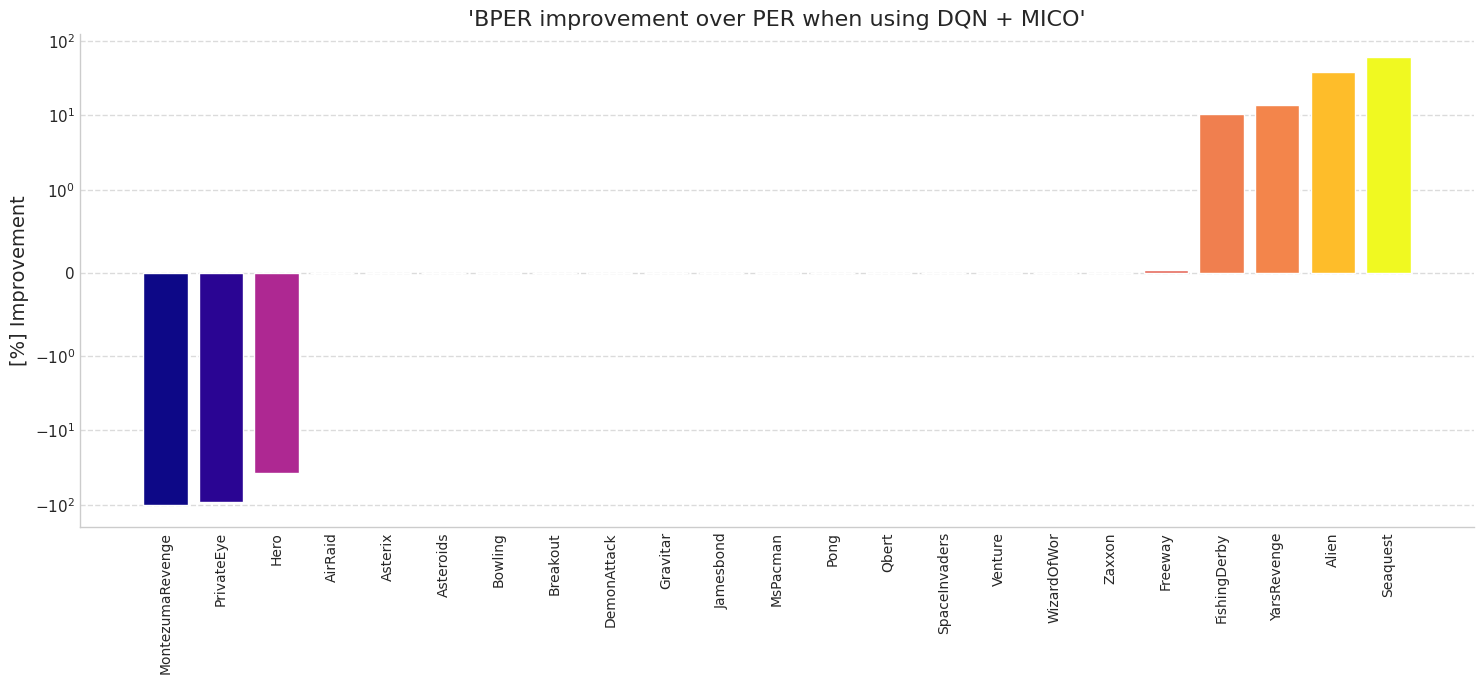

In [288]:
# games = list(_ATARI_DATA.keys())
# Create a reduce game vertical list with AirRaid, Asterix, Asteroids, Bowling, Breakout, DemonAttack, Freeway, Gravitar, Jamesbond, MontezumaRevenge, MsPacman, Pong, PrivateEye, Qbert, Seaquest, SpaceInvaders, Venture, WizardOfWor, YarsRevenge, Zaxxon
# NOTE: Reduce list of 20 games
# NOTE: the first line are some extra games that I want to test
game = 'Hero'
baseline = 'metric_dqn_per' # NOTE: I think it should be metric_dqn but I don't have all the results for every game
                            # Ask again to PSC
method_scheme = 'metric_dqn_bper_softmax'

game_names = [
    'Hero', 'Alien', "FishingDerby",
    'AirRaid', 'Asterix', 'Asteroids', 'Bowling', 'Breakout', 'DemonAttack',
    'Freeway', 'Gravitar', 'Jamesbond', 'MontezumaRevenge', 'MsPacman',
    'Pong', 'PrivateEye', 'Qbert', 'Seaquest', 'SpaceInvaders',
    'Venture', 'WizardOfWor', 'YarsRevenge', 'Zaxxon'
]

improvements = [0] * len(game_names)
for i, game in enumerate(game_names):
    try:
        percentage_improvement, mean_df = calculate_percentage_improvement(dataframes, game, baseline, method_scheme)
        improvements[i] = percentage_improvement
    except:
        improvements[i] = 0

# Plot the improvements
plot_improvement(game_names, improvements)

Baseline metric_dqn for game Freeway not found in the dataframe. Using approximate results.
Baseline metric_dqn for game MontezumaRevenge not found in the dataframe. Using approximate results.
Baseline metric_dqn for game PrivateEye not found in the dataframe. Using approximate results.


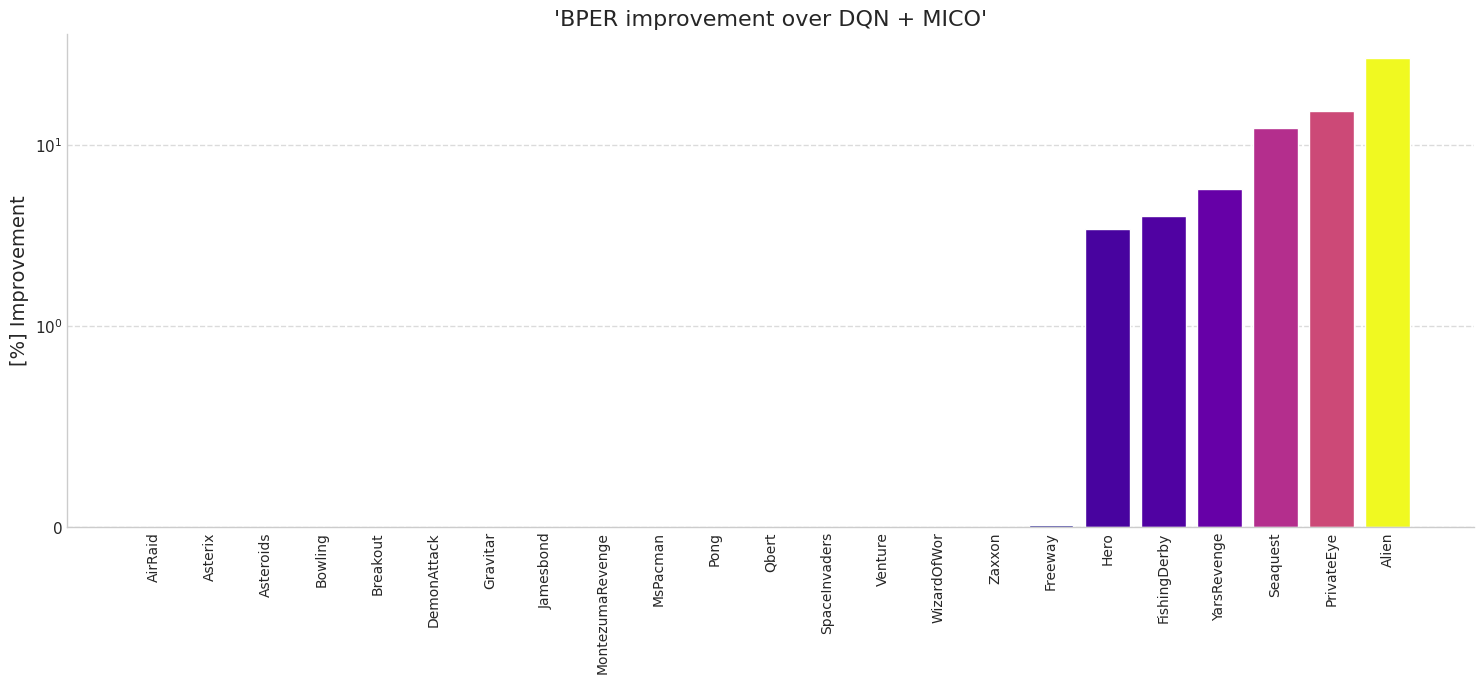

In [289]:
# games = list(_ATARI_DATA.keys())
# Create a reduce game vertical list with AirRaid, Asterix, Asteroids, Bowling, Breakout, DemonAttack, Freeway, Gravitar, Jamesbond, MontezumaRevenge, MsPacman, Pong, PrivateEye, Qbert, Seaquest, SpaceInvaders, Venture, WizardOfWor, YarsRevenge, Zaxxon
# NOTE: Reduce list of 20 games
# NOTE: the first line are some extra games that I want to test
game = 'Hero'
baseline = 'metric_dqn' # NOTE: I think it should be metric_dqn but I don't have all the results for every game
                            # Ask again to PSC
method_scheme = 'metric_dqn_bper_softmax'


game_names = [
    'Hero', 'Alien', "FishingDerby",
    'AirRaid', 'Asterix', 'Asteroids', 'Bowling', 'Breakout', 'DemonAttack',
    'Freeway', 'Gravitar', 'Jamesbond', 'MontezumaRevenge', 'MsPacman',
    'Pong', 'PrivateEye', 'Qbert', 'Seaquest', 'SpaceInvaders',
    'Venture', 'WizardOfWor', 'YarsRevenge', 'Zaxxon'
]

improvements = [0] * len(game_names)
for i, game in enumerate(game_names):
    try:
        percentage_improvement, mean_df = calculate_percentage_improvement(dataframes, game, baseline, method_scheme)
        improvements[i] = percentage_improvement
    except:
        improvements[i] = 0

# Plot the improvements
plot_improvement(game_names, improvements, title="'BPER improvement over DQN + MICO'")

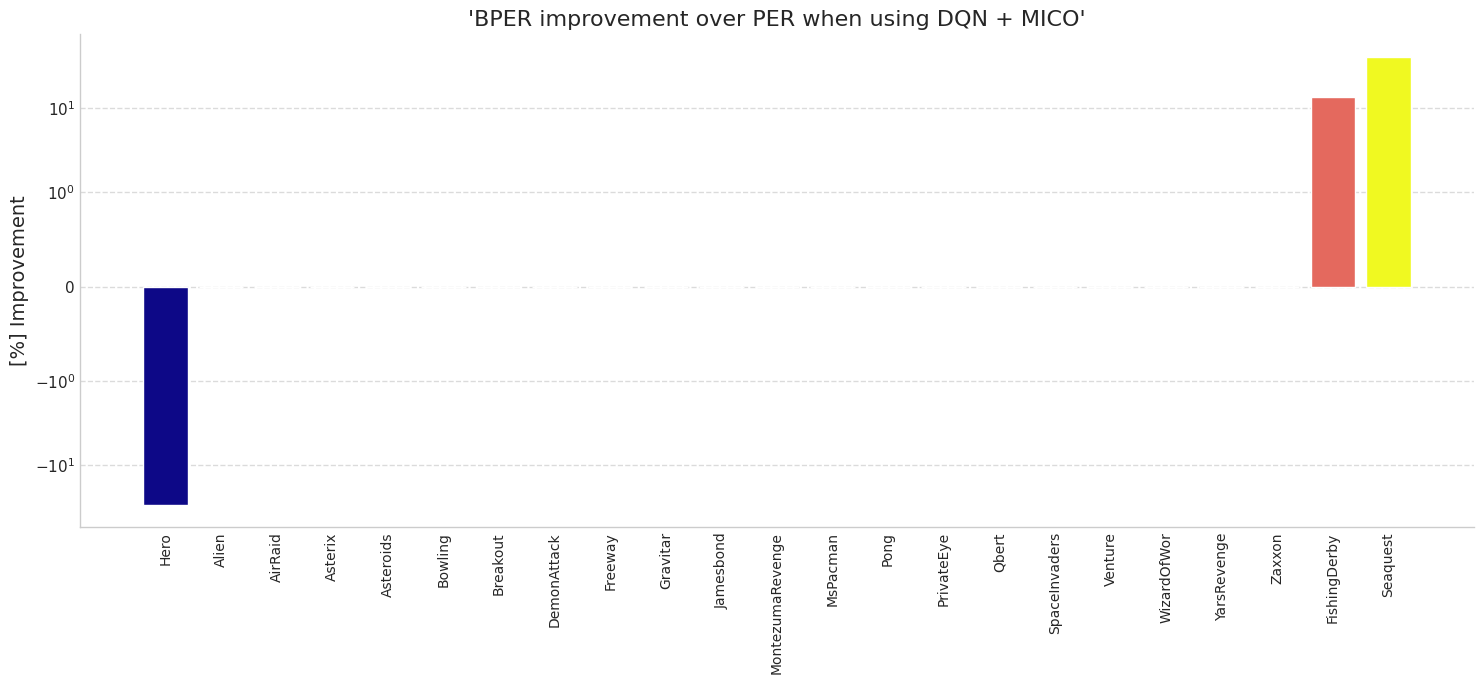

In [290]:
game = 'Hero'
baseline = 'metric_dqn_per' # NOTE: I think it should be metric_dqn but I don't have all the results for every game
                            # Ask again to PSC
method_scheme = 'metric_dqn_bper_scaling'

# games = list(_ATARI_DATA.keys())
# Create a reduce game vertical list with AirRaid, Asterix, Asteroids, Bowling, Breakout, DemonAttack, Freeway, Gravitar, Jamesbond, MontezumaRevenge, MsPacman, Pong, PrivateEye, Qbert, Seaquest, SpaceInvaders, Venture, WizardOfWor, YarsRevenge, Zaxxon
# NOTE: Reduce list of 20 games
# NOTE: the first line are some extra games that I want to test
game_names = [
    'Hero', 'Alien', "FishingDerby",
    'AirRaid', 'Asterix', 'Asteroids', 'Bowling', 'Breakout', 'DemonAttack',
    'Freeway', 'Gravitar', 'Jamesbond', 'MontezumaRevenge', 'MsPacman',
    'Pong', 'PrivateEye', 'Qbert', 'Seaquest', 'SpaceInvaders',
    'Venture', 'WizardOfWor', 'YarsRevenge', 'Zaxxon'
]

improvements = [0] * len(game_names)
for i, game in enumerate(game_names):
    try:
        percentage_improvement, mean_df = calculate_percentage_improvement(dataframes, game, baseline, method_scheme)
        improvements[i] = percentage_improvement
    except:
        improvements[i] = 0

# Plot the improvement
plot_improvement(game_names, improvements)

# Loading Extra Results

In [291]:
import pandas as pd
from tensorboard.backend.event_processing import event_accumulator

def load_tensorboard_logs(log_path):
    """Load TensorBoard logs into a pandas DataFrame.
    
    Args:
        log_path (str): Path to directory containing TensorBoard event files
        
    Returns:
        pd.DataFrame: DataFrame containing all scalar metrics with columns:
                      'wall_time', 'step', 'value', 'metric'
    """
    # Load event files
    ea = event_accumulator.EventAccumulator(log_path,
        size_guidance={
            event_accumulator.TENSORS: 0,  # 0 means load all
        })
    ea.Reload()
    
    # Get all scalar tags
    tags = ea.Tags()['tensors']
    
    # Create DataFrame
    df = pd.DataFrame()
    
    for tag in tags:
        # Get scalar data for each tag
        events = ea.Tensors(tag)
        tag_df = pd.DataFrame([{
            # 'wall_time': e.wall_time,
            'step': e.step,
            'value': np.frombuffer(e.tensor_proto.tensor_content, 
                                   dtype=np.float32)[0],
            'metric': tag
        } for e in events])
        
        # Append to main DataFrame
        df = pd.concat([df, tag_df], ignore_index=True)
    
    return df

# Example usage:
df = load_tensorboard_logs('/home/zosov/workspace/bisimulation-PER/logs/Hero/metric_dqn/118398')
df['metric'].unique()

array(['Losses/Aggregate', 'Losses/Bellman', 'Losses/Metric',
       'Train/NumEpisodes', 'Train/AverageReturns',
       'Train/AverageStepsPerSecond'], dtype=object)

In [292]:
df = load_tensorboard_logs('/home/zosov/workspace/bisimulation-PER/logs/MontezumaRevenge/metric_dqn_per/118398/')
df['metric'].unique()

array(['Losses/Aggregate', 'Losses/Bellman', 'Losses/Metric',
       'Stats/BisimulationDistanceAvg', 'Stats/BisimulationDistanceStd',
       'Stats/EuclideanDistanceAvg', 'Stats/EuclideanDistanceStd',
       'Stats/TD-ErrorAvg', 'Stats/TD-ErrorStd',
       'Stats/DormantPercentage', 'Train/NumEpisodes',
       'Train/AverageReturns', 'Train/AverageStepsPerSecond'],
      dtype=object)

In [293]:
import numpy as np
PROJECT_DIR = '/home/zosov/workspace/bisimulation-PER'

def get_metric_dataframes(metric, game, post_train=True):
    dict_games_post_stats = {}

    seeds = ['118398', '711872', '919409']
    agents = [
        # 'metric_dqn',
        'metric_dqn_per',
        # 'metric_dqn_bper_scaling',
        'metric_dqn_bper_softmax',
    ]

    for agent in agents:
        for seed in seeds:
            if post_train:
                df = load_tensorboard_logs(f'{PROJECT_DIR}/logs/{game}/{agent}/{seed}/eval_metrics')
            else:
                df = load_tensorboard_logs(f'{PROJECT_DIR}/logs/{game}/{agent}/{seed}')

            # Add a column with the agent name and other with the seed named agent and run_number
            df['agent'] = agent
            df['run_number'] = seed

            filter_metric = df[df["metric"] == metric]
            filter_metric = filter_metric[filter_metric['step'] <= 100_000_000].copy()

            # Add a column called iteration from number to 1 to the number of rows
            filter_metric['iteration'] = np.arange(1, len(filter_metric)+1)

            # Rename the name of the column value to metric
            filter_metric = filter_metric.rename(columns={"value": metric})

            # Remove the column called metric
            filter_metric = filter_metric.drop(columns=["metric"])
            filter_metric = filter_metric.drop(columns=["step"])

            if game not in dict_games_post_stats:
                dict_games_post_stats[game] = filter_metric
            else:
                # Merge the dataframes
                dict_games_post_stats[game] = dict_games_post_stats[game].merge(
                    filter_metric, how='outer')
    return dict_games_post_stats

In [307]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_eval_metrics(game, x_axis='iteration', 
              y_axes=[],
              x_label='Iteration', y_labels=[],
              post_train=True):
    
    # Define a custom color palette with 4 colors
    custom_palette = {
        "metric_dqn": "#d62728",       # Blue
        "metric_dqn_per": "#ff7f0e",   # Orange
        "metric_dqn_bper": "#2ca02c",  # Green
        "dqn": "#1f77b4",               # Red
        "metric_dqn_bper_norm": "#9467bd", # Purple
        "metric_dqn_bper_no_norm": "#2ca02c",  # Green
        "metric_dqn_bper_scaling": "#029e73ff", # Brown
        "metric_dqn_bper_softmax": "#000000", # Black
        "metric_dqn_bper_softmax_weight": "#8c564b", # Light Pink
        "metric_dqn_bper_exponential_norm": "#e377c2", # Light Purple
        "metric_dqn_bper_td_weights" : "#7f7f7f", # Gray
        "metric_dqn_bper_scaling_512": "#64b5cd", # Light Blue
    }

    

    # Create figure with 6 subplots in a row
    fig, axes = plt.subplots(1, len(y_axes), figsize=(24, 4))
    
    # Plot each metric in its own subplot
    for i, (y_axis, y_label) in enumerate(zip(y_axes, y_labels)):

        dataframes = get_metric_dataframes(y_axis, game, post_train)

        # Filter the data to include only the first 100 iterations
        filtered_data = dataframes[game][dataframes[game]['iteration'] <= 100]

        sns.lineplot(x=x_axis, y=y_axis, hue='agent',
                    data=filtered_data, ax=axes[i], palette=custom_palette)
        axes[i].set_title(f'{game} - {y_label}')
        axes[i].set_xlabel(x_label)
        axes[i].set_ylabel(y_label)
        
        # Only show legend on the first subplot to save space
        if i != 0:
            axes[i].get_legend().remove()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

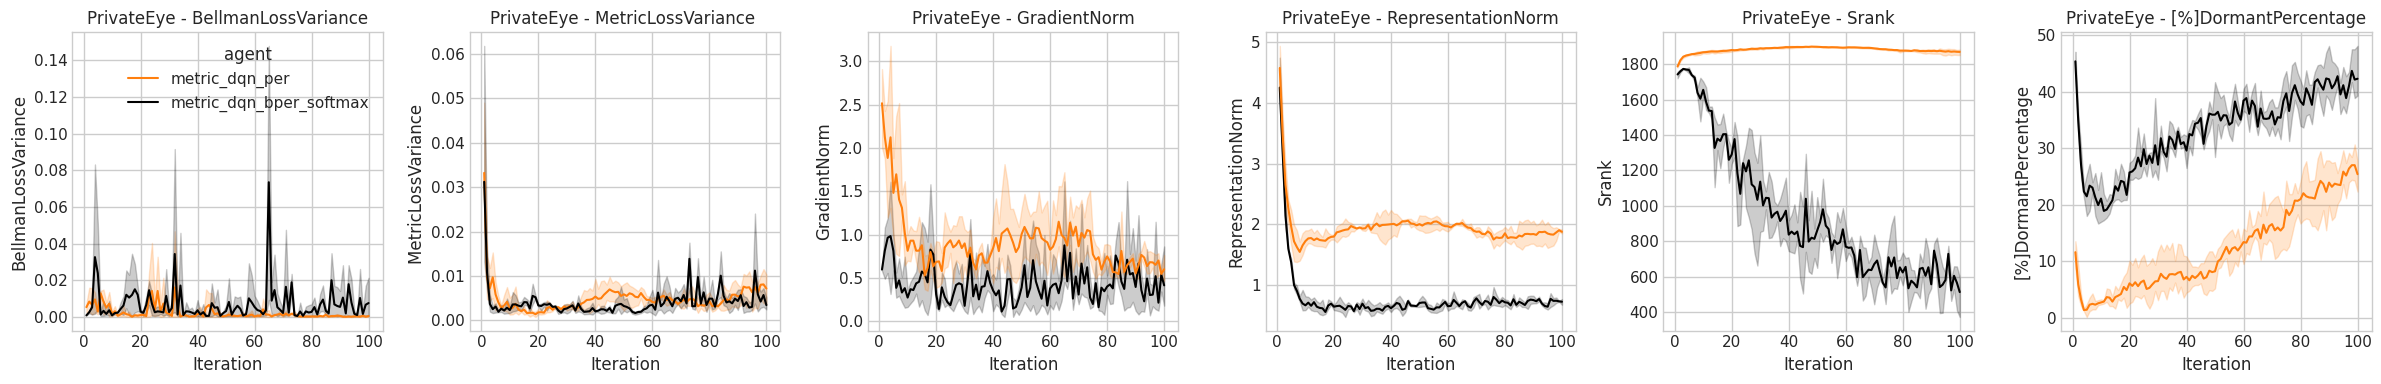

In [304]:
# eval_metrics = ['Eval/GradientNorm', 
#                 'Eval/Srank', 
#                 'Eval/DormantPercentage',
#                 'Eval/TD-Residuals', 
#                 'Eval/RepresentationNorm',
#                 'Eval/LossVarianceBellmanLoss', 
#                 'Eval/LossVarianceMetricLoss',
#                 'Exploration/BisimulationDistanceAvg',
#                 'Exploration/EuclideanDistanceAvg', 
#                 'Exploration/TD-ErrorAvg',
#               #   'Exploration/BisimulationDistanceStd',
#               #   'Exploration/EuclideanDistanceStd', 
#               #   'Exploration/TD-ErrorStd'
#                 ]#

eval_metrics = [
                'Eval/LossVarianceBellmanLoss', 
                'Eval/LossVarianceMetricLoss',
                'Eval/GradientNorm', 
                'Eval/RepresentationNorm',
                'Eval/Srank', 
                'Eval/DormantPercentage',
                ]

labels = [
    'BellmanLossVariance',
    'MetricLossVariance ',
    'GradientNorm',
    'RepresentationNorm',
    'Srank',
    '[%]DormantPercentage'
]

game = 'PrivateEye'

plot_eval_metrics(game, y_axes=eval_metrics,y_labels=labels)

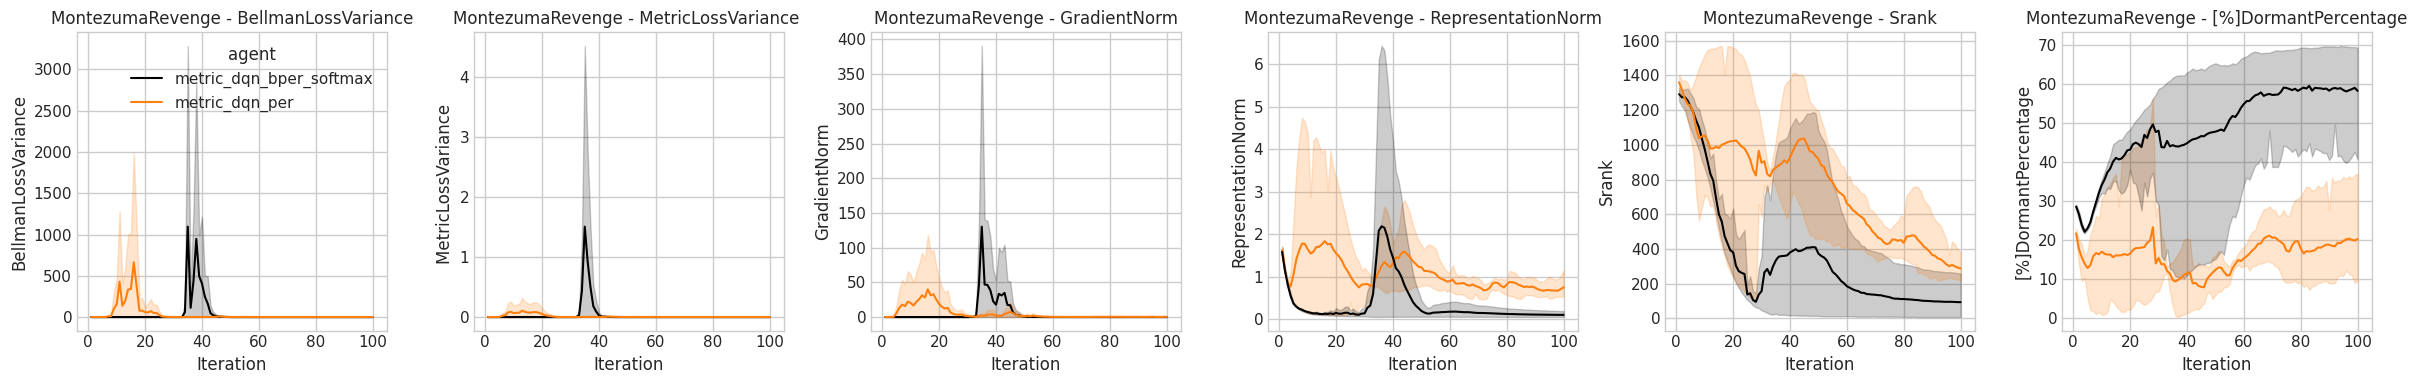

In [ ]:
game = 'MontezumaRevenge'

plot_eval_metrics(game, y_axes=eval_metrics,y_labels=labels)

Data Diversity Results during training from experience replay


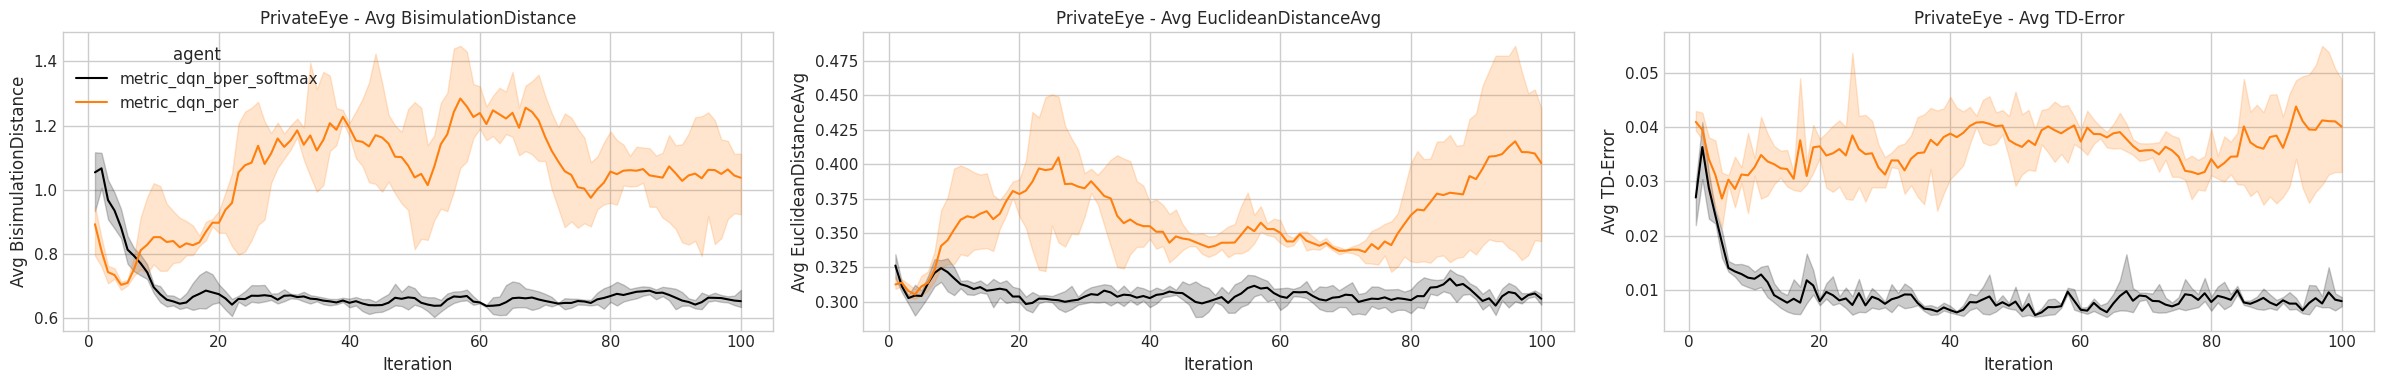

Exploration Results post training from rollouts


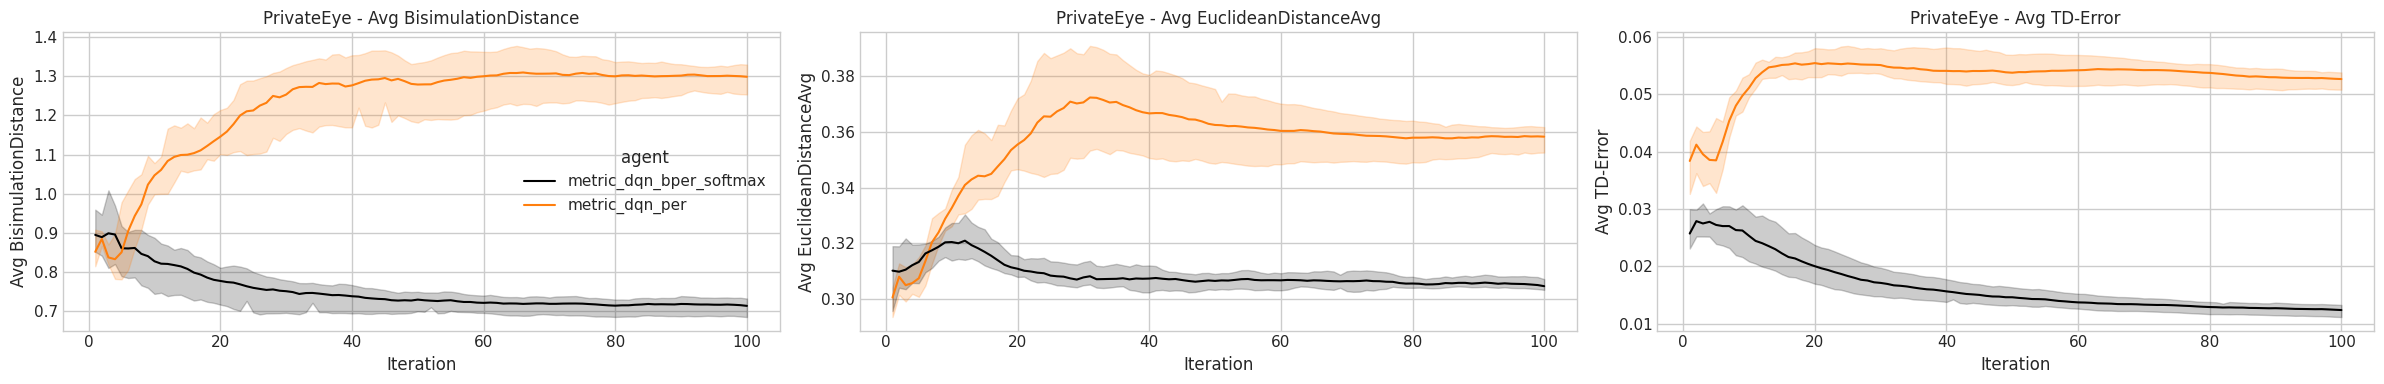

In [ ]:
# DataDiversity in the ExpericienceReplay Results
game = 'PrivateEye'

eval_metrics = [
    'Stats/BisimulationDistanceAvg',
    'Stats/EuclideanDistanceAvg',
    'Stats/TD-ErrorAvg'
    ]

labels = [
    'Avg BisimulationDistance',
    'Avg EuclideanDistanceAvg',
    'Avg TD-Error'
]


print("Data Diversity Results during training from experience replay")
plot_eval_metrics(game, x_axis='iteration',
              y_axes=eval_metrics,
              x_label='Iteration', y_labels=labels, post_train=False)

eval_metrics = [
                'Exploration/BisimulationDistanceAvg', 
                'Exploration/EuclideanDistanceAvg',
                'Exploration/TD-ErrorAvg', 
                ]

labels = [
    'Avg BisimulationDistance',
    'Avg EuclideanDistanceAvg',
    'Avg TD-Error'
]

print("Exploration Results post training from rollouts")
plot_eval_metrics(game, y_axes=eval_metrics,y_labels=labels)

Data Diversity Results during training from experience replay


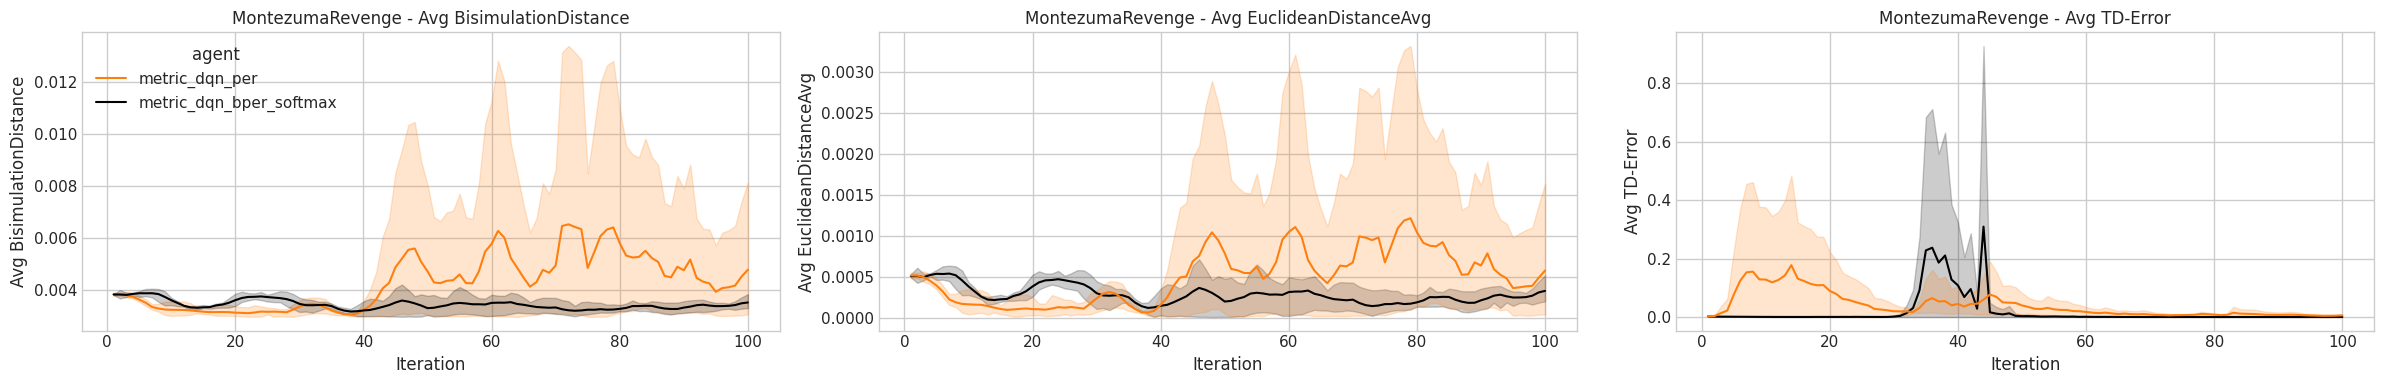

Exploration Results post training from rollouts


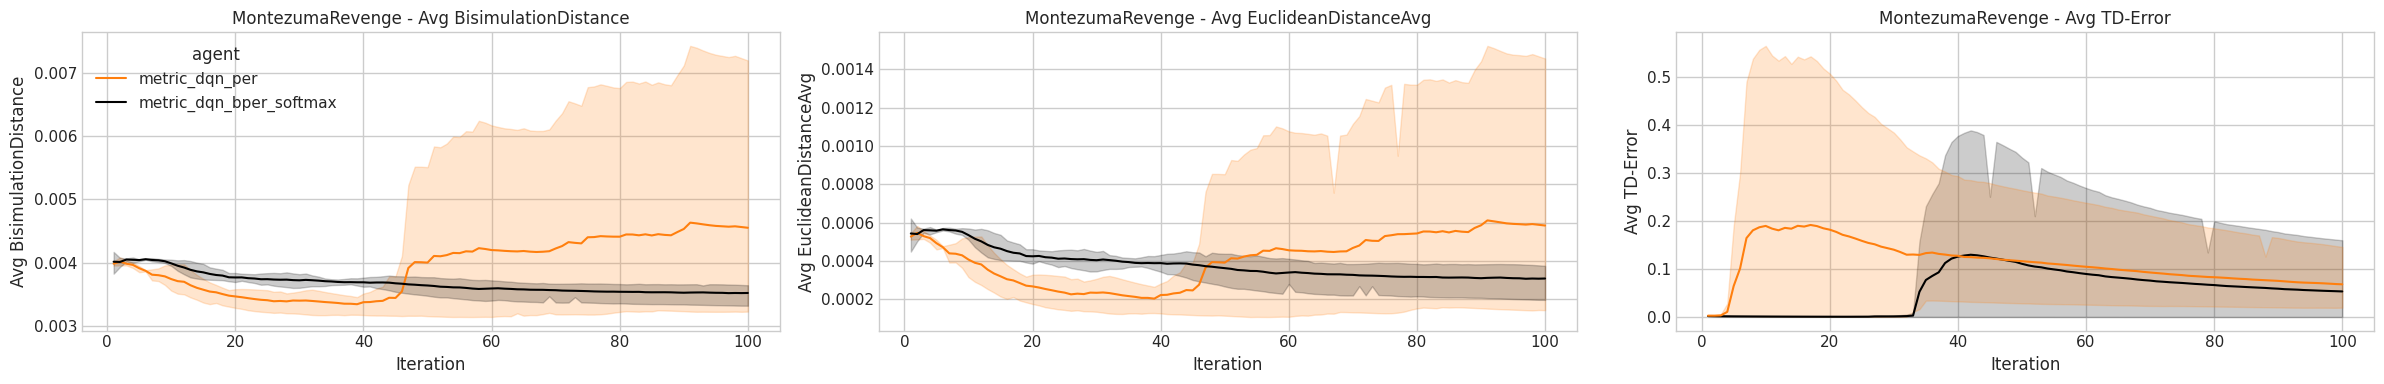

In [311]:
# DataDiversity in the ExpericienceReplay Results
game = 'MontezumaRevenge'

eval_metrics = [
    'Stats/BisimulationDistanceAvg',
    'Stats/EuclideanDistanceAvg',
    'Stats/TD-ErrorAvg'
    ]

labels = [
    'Avg BisimulationDistance',
    'Avg EuclideanDistanceAvg',
    'Avg TD-Error'
]


print("Data Diversity Results during training from experience replay")
plot_eval_metrics(game, x_axis='iteration',
              y_axes=eval_metrics,
              x_label='Iteration', y_labels=labels, post_train=False)

eval_metrics = [
                'Exploration/BisimulationDistanceAvg', 
                'Exploration/EuclideanDistanceAvg',
                'Exploration/TD-ErrorAvg', 
                ]

labels = [
    'Avg BisimulationDistance',
    'Avg EuclideanDistanceAvg',
    'Avg TD-Error'
]

print("Exploration Results post training from rollouts")
plot_eval_metrics(game, y_axes=eval_metrics,y_labels=labels)

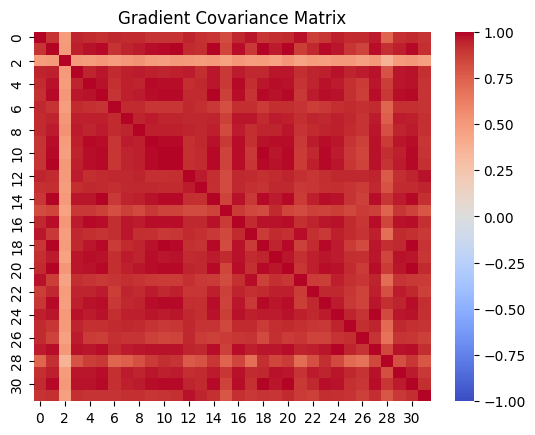

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

PROJECT_DIR = '/home/zosov/workspace/bisimulation-PER'

# Load the followin numpy array from the file
path_of_file = 'logs/MontezumaRevenge/metric_dqn_bper_softmax/118398/eval_metrics/npy_files/grad_covariance_matrix_99.npy'
path_of_file = f'{PROJECT_DIR}/{path_of_file}'
grad_covariance_matrix = np.load(path_of_file)



sns.heatmap(grad_covariance_matrix, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Gradient Covariance Matrix")
plt.show()

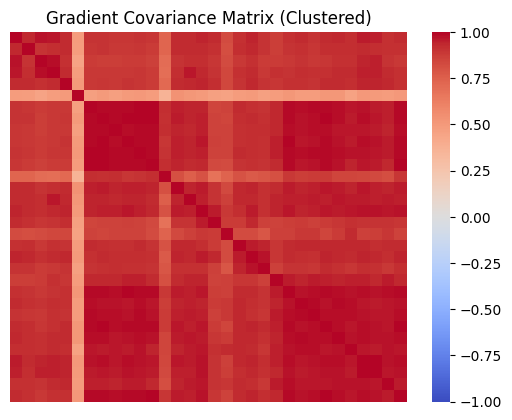

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def cluster_and_plot_covariance(cov_matrix, n_clusters=10):
    """
    Permute covariance matrix rows/cols via k-means clustering and plot.
    Args:
        cov_matrix: Gradient covariance matrix (k x k).
        n_clusters: Number of clusters (default: 10, as in the paper).
    """
    # --- Step 1: Cluster gradients using k-means ---
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(cov_matrix)  # Cluster assignments for each row
    
    # --- Step 2: Sort indices by cluster labels ---
    sorted_indices = np.argsort(clusters)  # Indices that would sort the clusters
    
    # --- Step 3: Permute the covariance matrix ---
    permuted_matrix = cov_matrix[sorted_indices][:, sorted_indices]
    
    # --- Step 4: Plot with cluster boundaries ---
    # plt.figure(figsize=(10, 8))
    ax = sns.heatmap(
        permuted_matrix,
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        xticklabels=False,
        yticklabels=False,
    )
    
    # Add lines to separate clusters (optional)
    # cluster_boundaries = np.where(np.diff(clusters[sorted_indices]) != 0)[0] + 1
    # for boundary in cluster_boundaries:
    #     ax.axhline(boundary, color="black", linewidth=1, linestyle="--")
    #     ax.axvline(boundary, color="black", linewidth=1, linestyle="--")
    
    plt.title("Gradient Covariance Matrix (Clustered)")
    plt.show()

# Example usage:
cluster_and_plot_covariance(grad_covariance_matrix, n_clusters=10)

In [ ]:
game = 'MontezumaRevenge'

seeds = ['118398', '711872', '919409']
agents = [
    # 'metric_dqn',
    'metric_dqn_per',
    # 'metric_dqn_bper_scaling',
    'metric_dqn_bper_softmax',
]


path_of_file = 'logs/MontezumaRevenge/metric_dqn_bper_softmax/118398/eval_metrics/npy_files/grad_covariance_matrix_99.npy'
path_of_file = f'{PROJECT_DIR}/{path_of_file}'
grad_covariance_matrix = np.load(path_of_file)